<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd
df = pd.set_option('display.float_format', '{:,.2f}'.format)
df = pd.read_csv('/datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0
5,6,15574012,Chu,645,Spain,Male,44,8.00,"113,755.78",2,1,0,"149,756.71",1
6,7,15592531,Bartlett,822,France,Male,50,7.00,0.00,2,1,1,"10,062.80",0
7,8,15656148,Obinna,376,Germany,Female,29,4.00,"115,046.74",4,1,0,"119,346.88",1
8,9,15792365,He,501,France,Male,44,4.00,"142,051.07",2,0,1,"74,940.50",0
9,10,15592389,H?,684,France,Male,27,2.00,"134,603.88",1,1,1,"71,725.73",0


In [4]:
df.duplicated().sum()

0

In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

In [6]:
df['Tenure'].isna().sum()

909

In [7]:
df['Tenure'] = df['Tenure'].fillna(-1).astype('int')

In [8]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0, -1])

In [9]:
# Преобразуем данные от дамми-ловушки
df_ohe = pd.get_dummies(df, drop_first=True)

In [10]:
df.tail(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,714,Germany,Male,33,3,"35,016.60",1,1,0,"53,667.08",0
9991,597,France,Female,53,4,"88,381.21",1,1,0,"69,384.71",1
9992,726,Spain,Male,36,2,0.00,1,1,0,"195,192.40",0
9993,644,France,Male,28,7,"155,060.41",1,1,0,"29,179.52",0
9994,800,France,Female,29,2,0.00,2,0,0,"167,773.55",0
9995,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0
9996,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1
9998,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1
9999,792,France,Female,28,-1,"130,142.79",1,1,0,"38,190.78",0


<div class="alert alert-info"><b>Комментарий студента:</b> 
    
Вывод: 
    
Датасет имеет 10 000 строк и 14 столбцов. Дубликатов нет. Есть пропуске в стобце 'Tenure'.
    
Удалил столбци 'RowNumber', 'Surname', 'CustomerId', 'Geography', 'Gender', т.к. для обучения модели они не нужны.
    
Количество пропусков в стобце 'Tenure' ~ 9% от общего кол-ва данных, заменил на -1 для сохранения других данных.
    
</div>

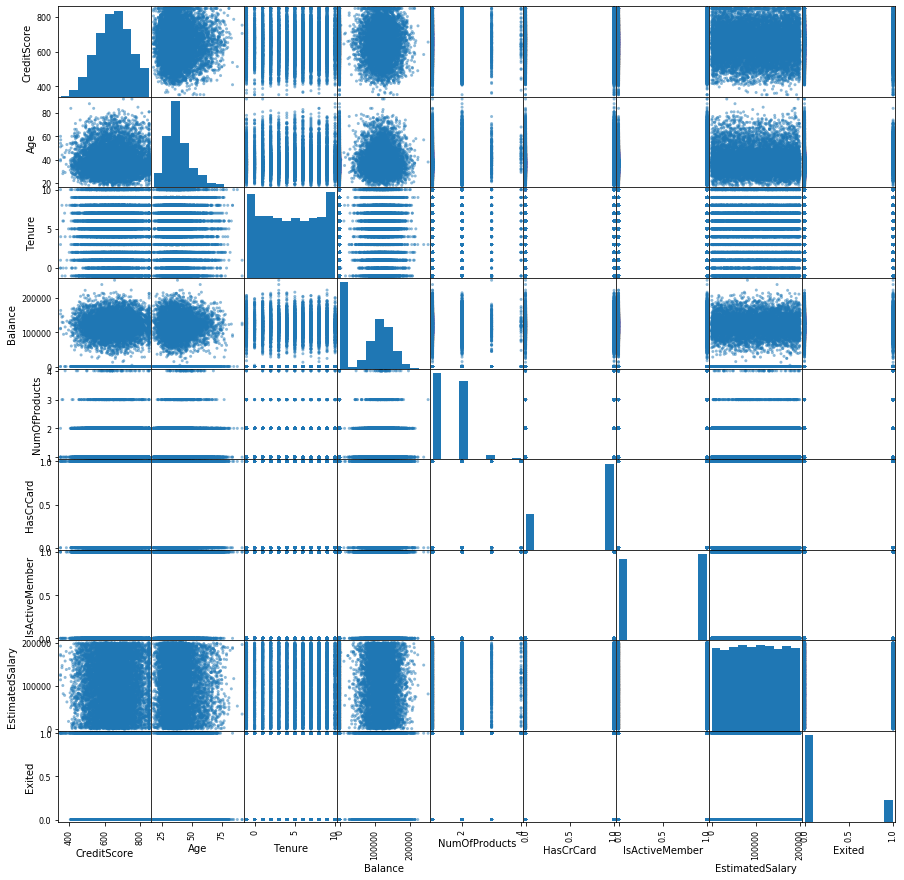

In [11]:
pd.plotting.scatter_matrix(df, figsize=(15, 15))
plt.show()

In [12]:
# Признаки
features = df_ohe.drop(['Exited'], axis=1)
# Целевой признак
target = df_ohe['Exited']

In [13]:
# Разделил на обучабщую и тестовую выборки
features_train, features_valid, target_train, target_valid = train_test_split(features, target, 
                                                                              test_size=0.25, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, 
                                                                                test_size=0.5, random_state=12345)

In [14]:
# Приведем численные признаки к одному масштабу
import warnings
warnings.filterwarnings("ignore")
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [15]:
print(features_train.shape, features_valid.shape, target_train.shape, target_valid.shape)

(7500, 11) (1250, 11) (7500,) (1250,)


## Исследование задачи

Проверим дисбаланс

In [16]:
df['Exited'].value_counts(normalize=True)

0   0.80
1   0.20
Name: Exited, dtype: float64

In [17]:
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [18]:
f1_score(target_valid, predicted_valid)

0.29213483146067415

Вывод: Соотношение 0 к 1 явно имеет дисбаланс. F1 мера очень маленькая 0.2 от желаемых 0.59. 
Проверили самую простую модель LogisticRegression, остальные модели тоже дадут низкие результаты, будем устронять дисбаланс.

## Борьба с дисбалансом

In [19]:
# Увилечение выборки класса 1
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [20]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(target_upsampled.value_counts())

1    6008
0    5998
Name: Exited, dtype: int64


In [21]:
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

In [22]:
f1_score(target_valid, predicted_valid)

0.5126162018592297

In [23]:
# Проверим соотношение auc_roc
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=12345)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [24]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.7699253797465917

Вывод: После изменения баланса модель LogisticRegression f1 метрика 0,47, проверим другие модели.

In [25]:
# Выберим модель Дерево решений
for depth in range(1, 11):
    model = DecisionTreeClassifier(class_weight='balanced', max_depth=depth, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    print(f'Глубина {depth}:', model.score(features_valid, target_valid), f'f1:',f1_score(target_valid, predicted_valid))

Глубина 1: 0.7432 f1: 0.4864
Глубина 2: 0.756 f1: 0.5314900153609832
Глубина 3: 0.756 f1: 0.5314900153609832
Глубина 4: 0.7216 f1: 0.5359999999999999
Глубина 5: 0.8056 f1: 0.6035889070146819
Глубина 6: 0.7696 f1: 0.5789473684210527
Глубина 7: 0.748 f1: 0.5655172413793105
Глубина 8: 0.7664 f1: 0.5667655786350148
Глубина 9: 0.7672 f1: 0.5751824817518247
Глубина 10: 0.76 f1: 0.5588235294117647


In [26]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=12345)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8487890099814701

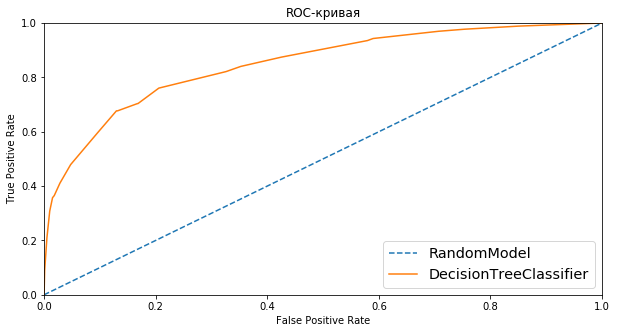

In [27]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure(figsize=[10,5])
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.plot(fpr, tpr, label='DecisionTreeClassifier')
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

Вывод: После изменения баланса модель DecisionTreeClassifier лучшая f1 метрика 0,596 при глубине дерева 5, проверим другие модели.

In [28]:
# Выберим модель Случайный лес
for est in range(10, 201, 10):
    model = RandomForestClassifier(class_weight='balanced', n_estimators=est, max_depth=10, random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print(f'Кол-во деревьев {est}:', model.score(features_valid, target_valid), f'f1:',f1_score(target_valid, predicted_valid))

Кол-во деревьев 10: 0.82 f1: 0.6218487394957983
Кол-во деревьев 20: 0.82 f1: 0.6268656716417911
Кол-во деревьев 30: 0.8272 f1: 0.6387959866220737
Кол-во деревьев 40: 0.8328 f1: 0.6427350427350428
Кол-во деревьев 50: 0.8336 f1: 0.6474576271186441
Кол-во деревьев 60: 0.832 f1: 0.6440677966101694
Кол-во деревьев 70: 0.8312 f1: 0.6405451448040886
Кол-во деревьев 80: 0.828 f1: 0.6374367622259697
Кол-во деревьев 90: 0.8328 f1: 0.6451612903225806
Кол-во деревьев 100: 0.8336 f1: 0.6474576271186441
Кол-во деревьев 110: 0.836 f1: 0.6495726495726495
Кол-во деревьев 120: 0.8352 f1: 0.6484641638225257
Кол-во деревьев 130: 0.8376 f1: 0.652991452991453
Кол-во деревьев 140: 0.8344 f1: 0.6424870466321244
Кол-во деревьев 150: 0.836 f1: 0.6447140381282496
Кол-во деревьев 160: 0.8304 f1: 0.6332179930795848
Кол-во деревьев 170: 0.8312 f1: 0.6380789022298456
Кол-во деревьев 180: 0.8336 f1: 0.6438356164383561
Кол-во деревьев 190: 0.8352 f1: 0.6472602739726028
Кол-во деревьев 200: 0.836 f1: 0.6483704974271012

In [29]:
# Проверим соотношение auc_roc
model = RandomForestClassifier(class_weight='balanced', n_estimators=50, max_depth=10, random_state=12345)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

In [30]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
auc_roc

0.8658145241754983

In [31]:
print(f'f1:',f1_score(target_valid, predicted_valid))

f1: 0.6483704974271012


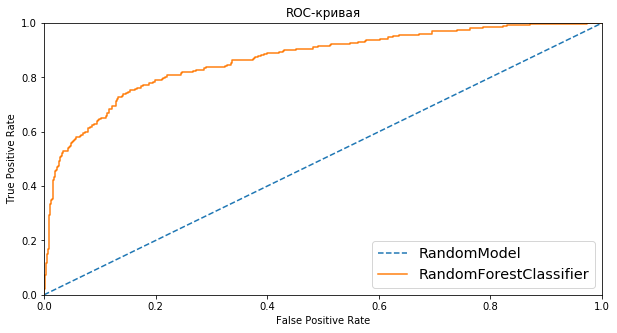

In [32]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure(figsize=[10,5])
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.plot(fpr, tpr, label='RandomForestClassifier')
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

Вывод: Основным решением для устранения дисбаланса стало увеличение классов 1 в тренировочной выборке.
Выравнивание привело к повышению результатов предсказания для всех трех моделей, но лучшие результаты у "Дерева решений" и "Случайного леса".

## Тестирование модели

In [33]:
# model = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=12345)
# model.fit(features_test, target_test)

# predicted_test = model.predict(features_test)
# print('test:', f1_score(target_test, predicted_test))

In [36]:
#КОД РЕВЬЮЕРА
model = RandomForestClassifier(class_weight='balanced', n_estimators=50, max_depth=10, random_state=12345)
model.fit(features_train, target_train)

predicted_test = model.predict(features_test)
print('test:', f1_score(target_test, predicted_test))

test: 0.6137184115523466


Вывод: f1 мера тестовой и валидационной модели "Случайного леса" достигли цели в 0,59.

<div class="alert alert-info"><b>Комментарий студента:</b> 
    
Вывод: Была полученна лучшая модель "Случайного леса" с AUC_ROC 84% и f1 мерой 0,6.
    
Оценивая адеватность модели можно заметить, что AUC-ROC дисбалансной модели и модели с весами примерно одинаково предсказывают вероятность ухода клиента.
    
</div>